In [1]:
import matplotlib.pyplot as plt
import scanpy as sc
from utils import observe_condition, observe_cell_types

adata = sc.read_h5ad("../nCoV_dataset_full.h5ad")

In [2]:
print("Observation keys before observing condition and cell types")
print(adata.obs.keys())

observe_condition(adata)
observe_cell_types(adata)

print("Observation keys after observing condition and cell types")
print(adata.obs.keys())

Observation keys before observing condition and cell types
Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'batch', 'percent.mt',
       'seurat_clusters', 'cell_type', 'integrated_snn_res.0.8', 'Stage'],
      dtype='object')
Observation keys after observing condition and cell types
Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'batch', 'percent.mt',
       'seurat_clusters', 'cell_type', 'integrated_snn_res.0.8', 'Stage',
       'sample_name', 'condition', 'cell_type_name'],
      dtype='object')


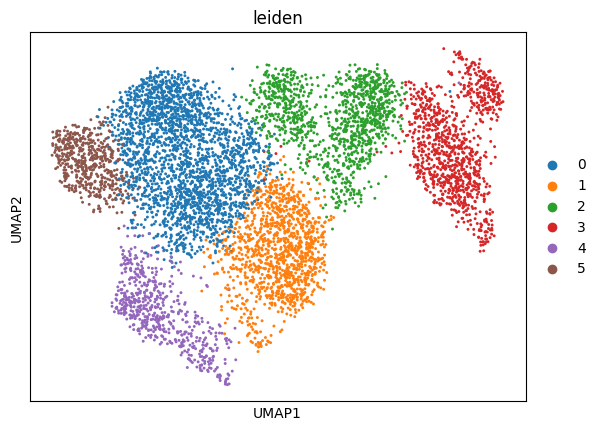

In [7]:
mono = adata[adata.obs["cell_type_name"] == "Cytotoxic CD8 T cells"].copy()

sc.pp.normalize_total(mono, target_sum=1e4)
sc.pp.log1p(mono)
sc.pp.pca(mono)
sc.pp.neighbors(mono)
sc.tl.umap(mono)
sc.tl.leiden(mono, resolution=0.5)

sc.pl.umap(mono, color=["leiden"])


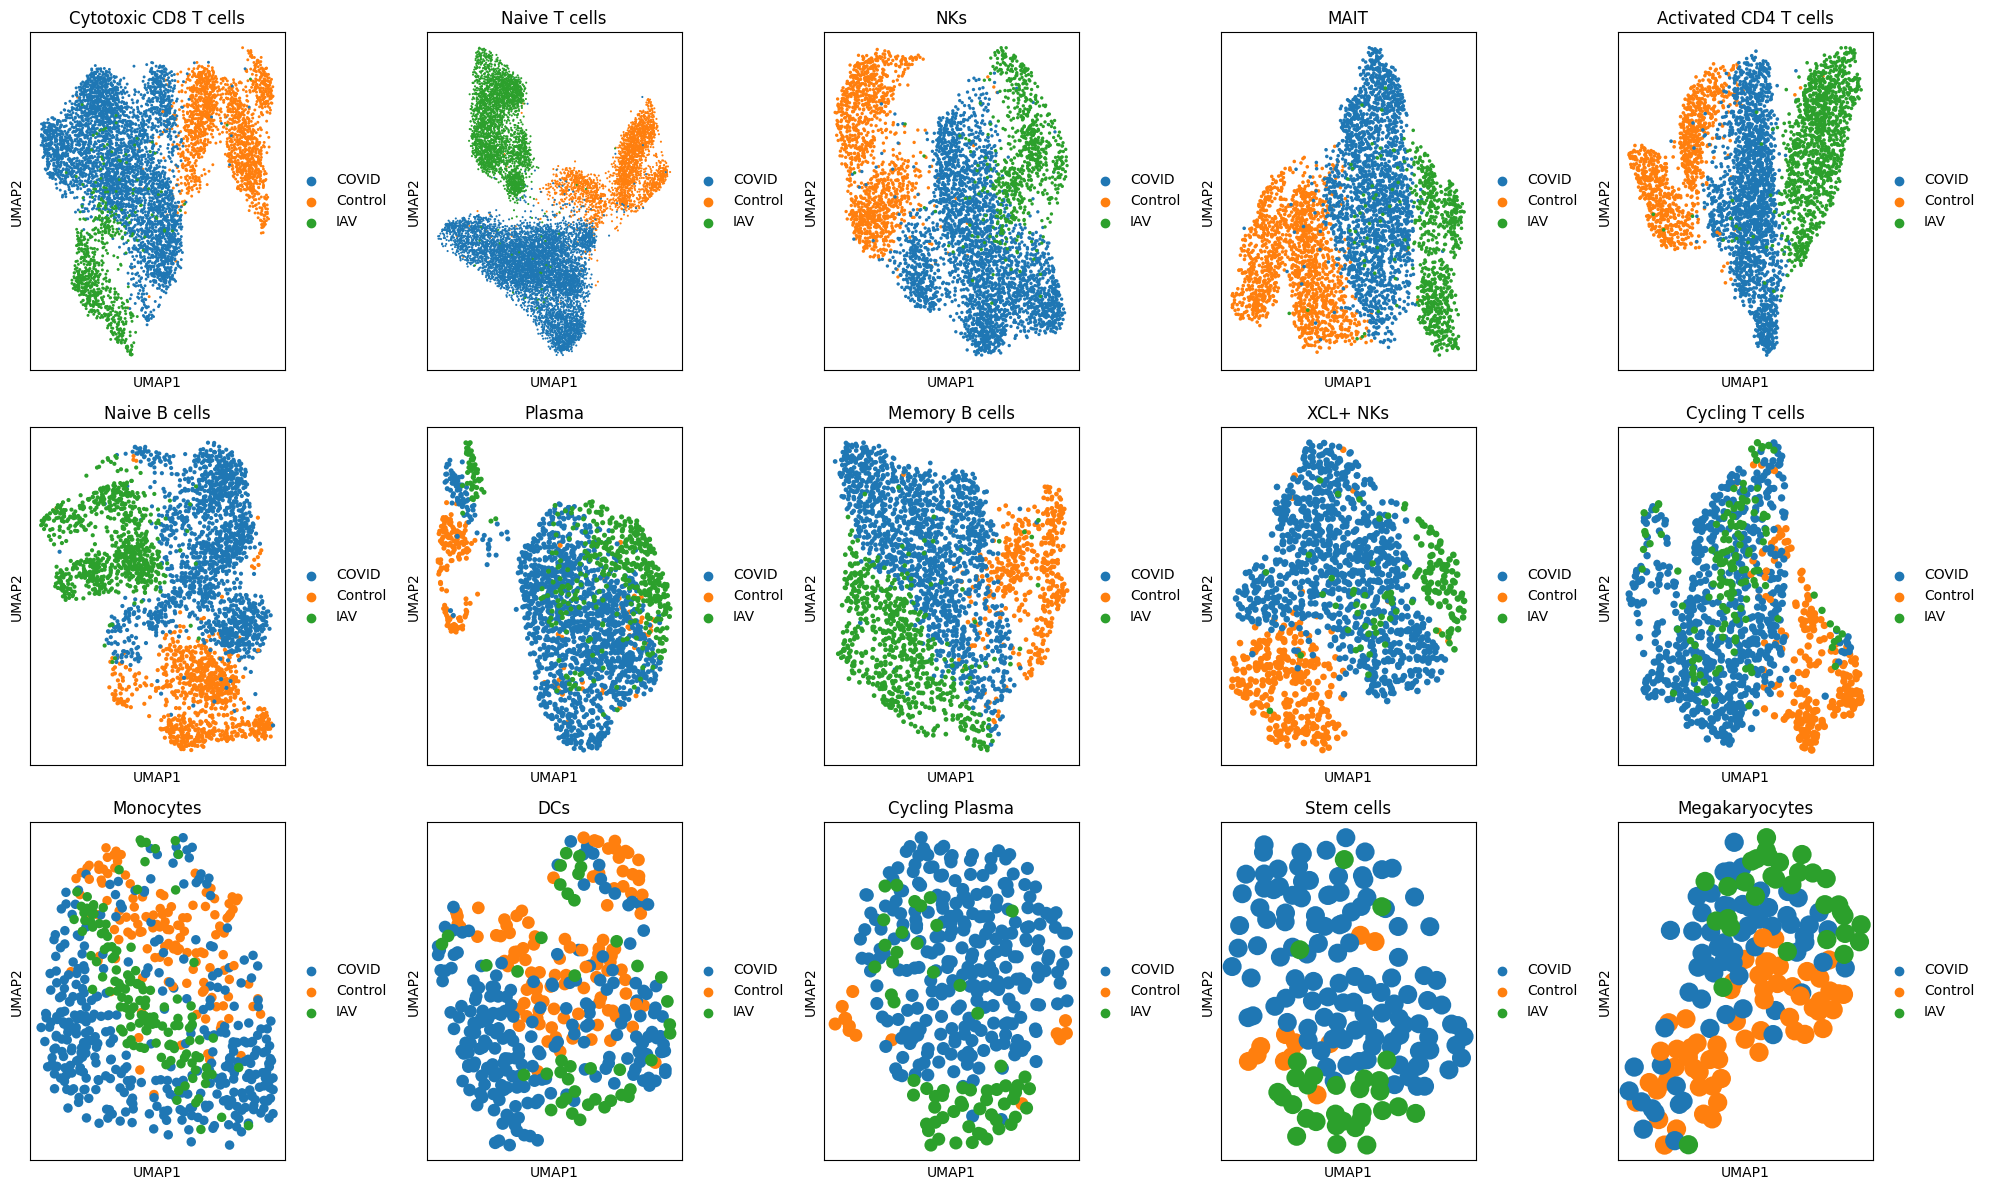

In [5]:
import scanpy as sc
import matplotlib.pyplot as plt

# Define the mapping from numeric ID to cell type
cell_type_mapping = {
    0: "Cytotoxic CD8 T cells",
    1: "Naive T cells",
    2: "NKs",
    3: "MAIT",
    4: "Activated CD4 T cells",
    5: "Naive B cells",
    6: "Plasma",
    7: "Memory B cells",
    8: "XCL+ NKs",
    9: "Cycling T cells",
    10: "Monocytes",
    11: "DCs",
    12: "Cycling Plasma",
    13: "Stem cells",
    14: "Megakaryocytes",
}

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))
axes = axes.flatten()

# Loop through each cell type
for i, (cell_id, cell_name) in enumerate(cell_type_mapping.items()):
    ax = axes[i]
    subset = adata[adata.obs["cell_type"] == cell_id].copy()
    
    # Run full Scanpy pipeline on subset
    sc.pp.normalize_total(subset, target_sum=1e4)
    sc.pp.log1p(subset)
    sc.pp.pca(subset)
    sc.pp.neighbors(subset)
    sc.tl.umap(subset)
    sc.tl.leiden(subset, resolution=0.5)
    
    # Plot UMAP colored by condition
    sc.pl.umap(subset, color="condition", ax=ax, show=False, title=cell_name)

# Clean up empty subplot if there are fewer than 15 plots
for j in range(len(cell_type_mapping), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


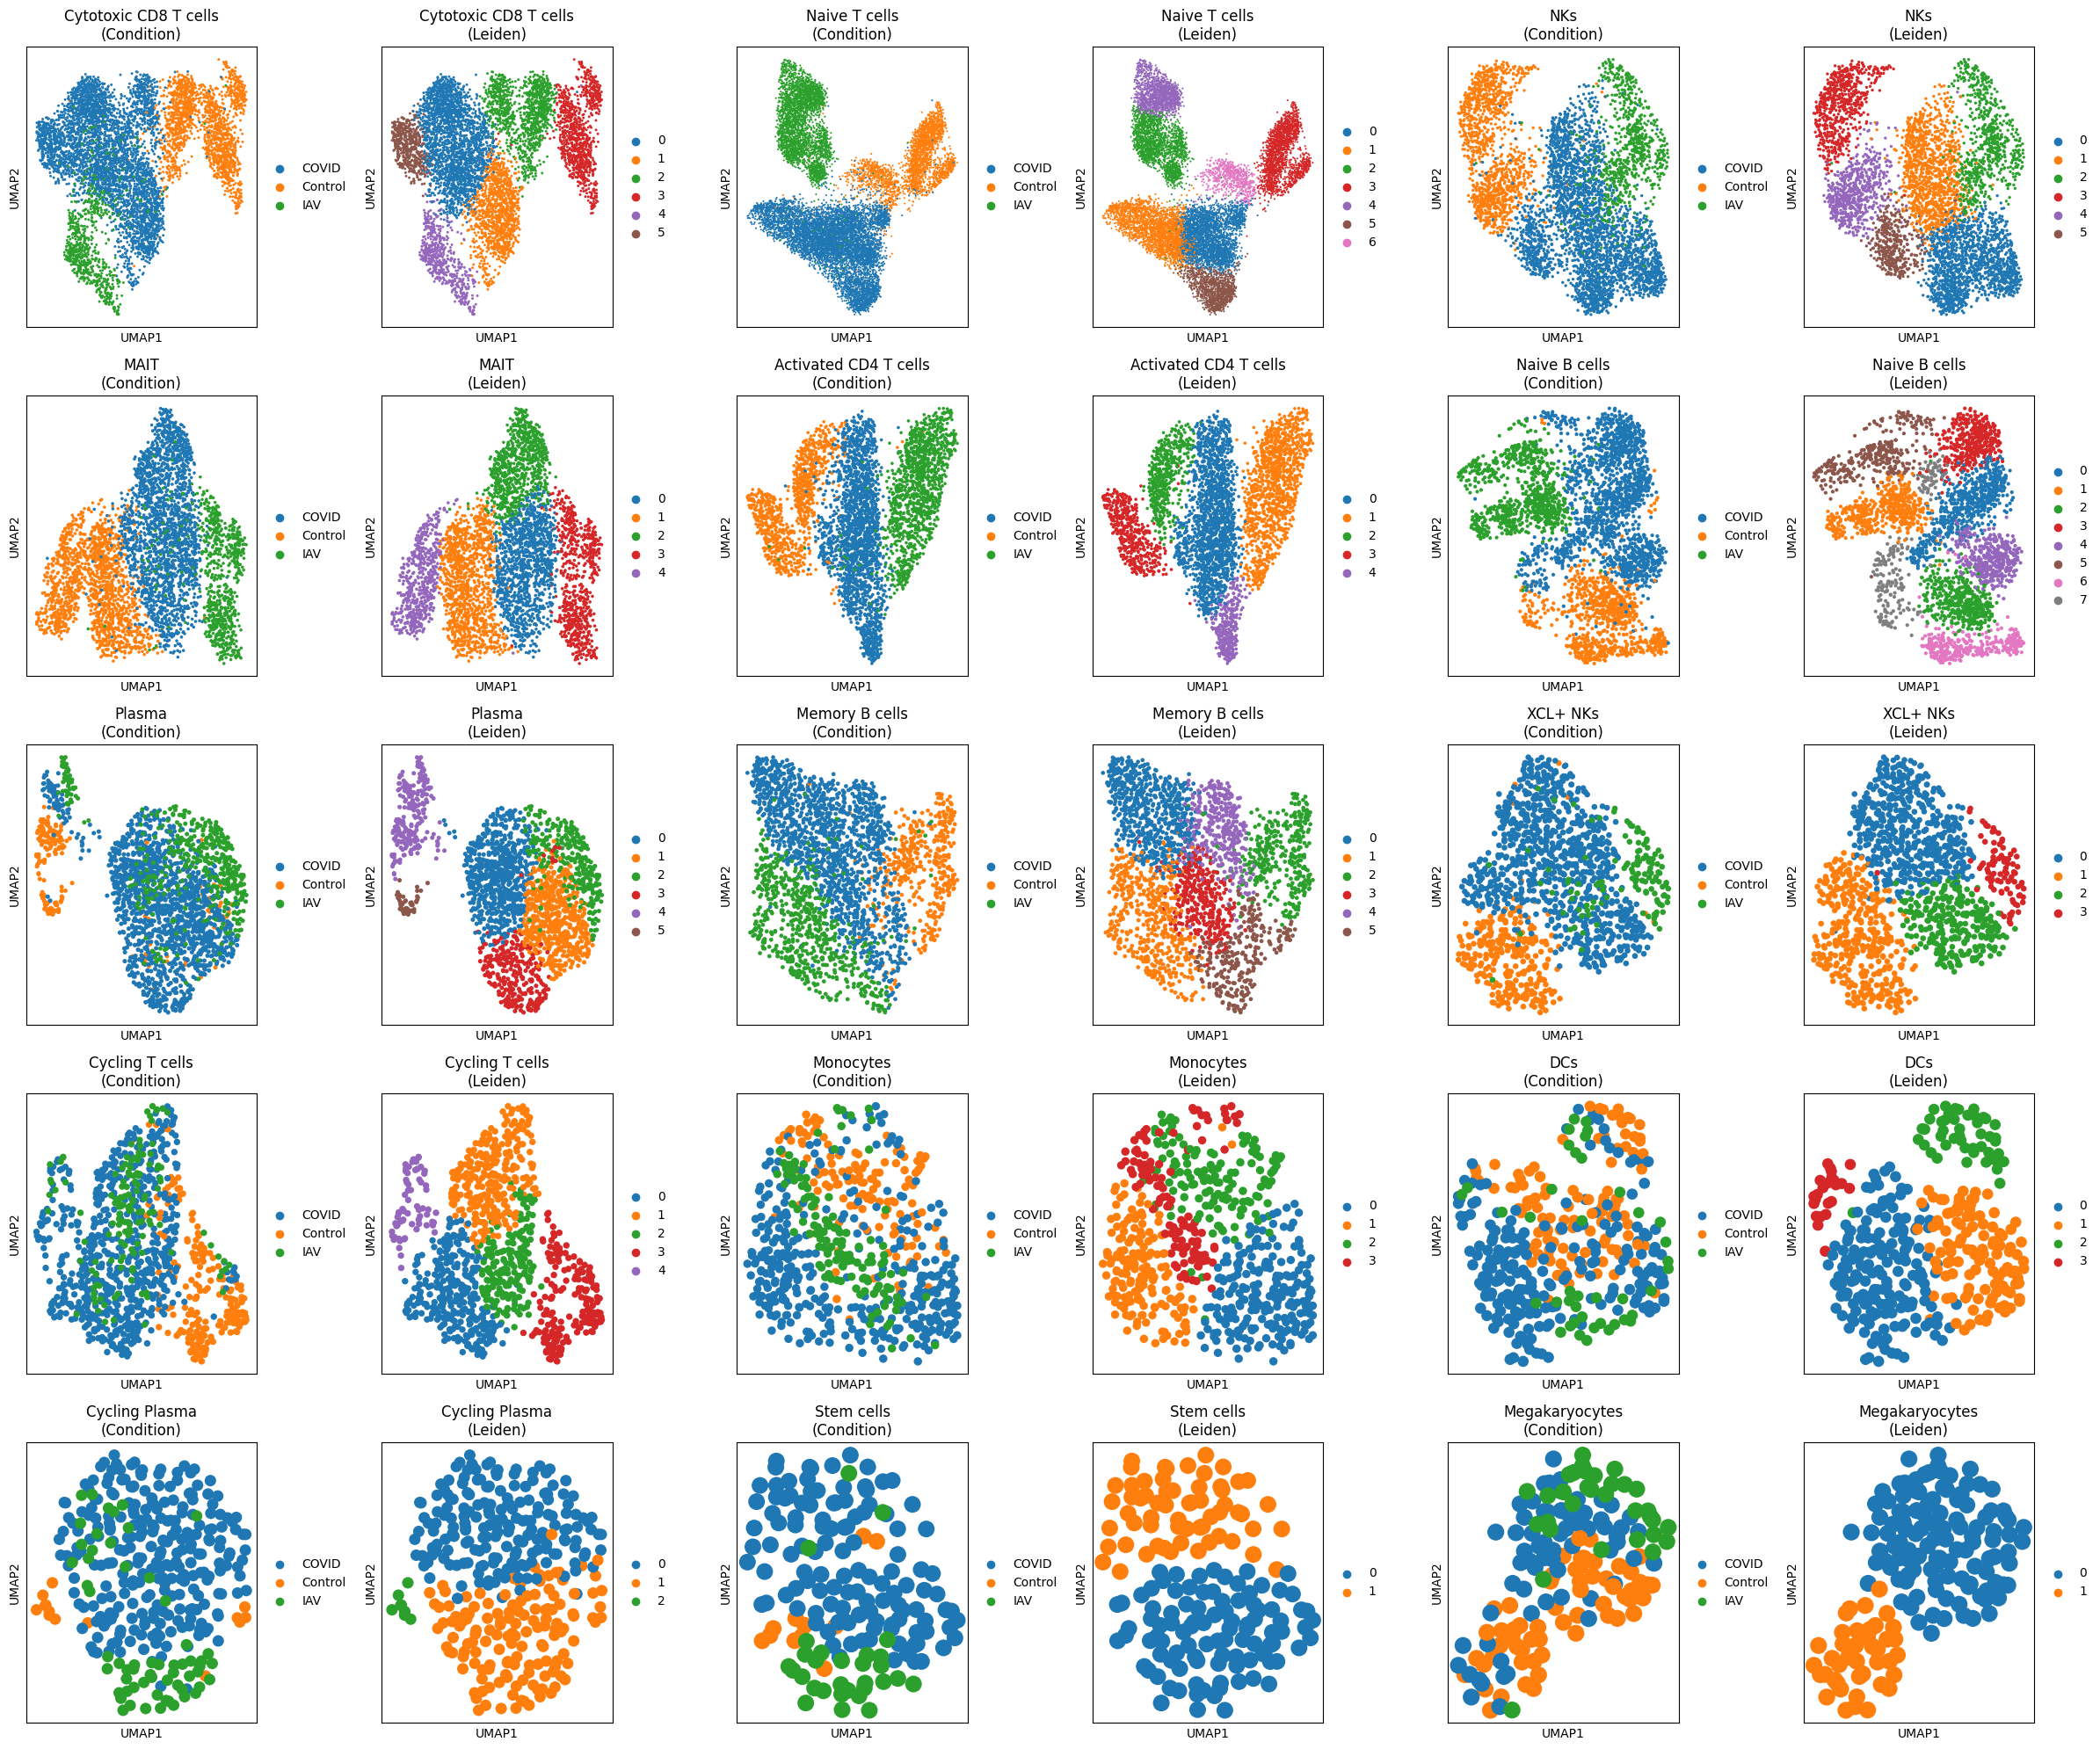

In [9]:
import scanpy as sc
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score

# Define the mapping from numeric ID to cell type
cell_type_mapping = {
    0: "Cytotoxic CD8 T cells",
    1: "Naive T cells",
    2: "NKs",
    3: "MAIT",
    4: "Activated CD4 T cells",
    5: "Naive B cells",
    6: "Plasma",
    7: "Memory B cells",
    8: "XCL+ NKs",
    9: "Cycling T cells",
    10: "Monocytes",
    11: "DCs",
    12: "Cycling Plasma",
    13: "Stem cells",
    14: "Megakaryocytes",
}

n_cells = len(cell_type_mapping)
ncols = 6  # 3 cell types × 2 plots each
nrows = (n_cells + 2) // 3  # 3 cells per row

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4 * ncols, 4 * nrows))
axes = axes.flatten()

for i, (cell_id, cell_name) in enumerate(cell_type_mapping.items()):
    subset = adata[adata.obs["cell_type"] == cell_id].copy()
    
    # Run full Scanpy pipeline on subset
    sc.pp.normalize_total(subset, target_sum=1e4)
    sc.pp.log1p(subset)
    sc.pp.pca(subset)
    sc.pp.neighbors(subset)
    sc.tl.umap(subset)
    sc.tl.leiden(subset, resolution=0.5)
    
    # UMAP by condition (left subplot)
    ax_cond = axes[2 * i]
    sc.pl.umap(subset, color="condition", ax=ax_cond, show=False, title=f"{cell_name}\n(Condition)")
    
    # UMAP by Leiden cluster (right subplot)
    ax_lei = axes[2 * i + 1]
    sc.pl.umap(subset, color="leiden", ax=ax_lei, show=False, title=f"{cell_name}\n(Leiden)")

# Remove unused axes if any
for j in range(2 * n_cells, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


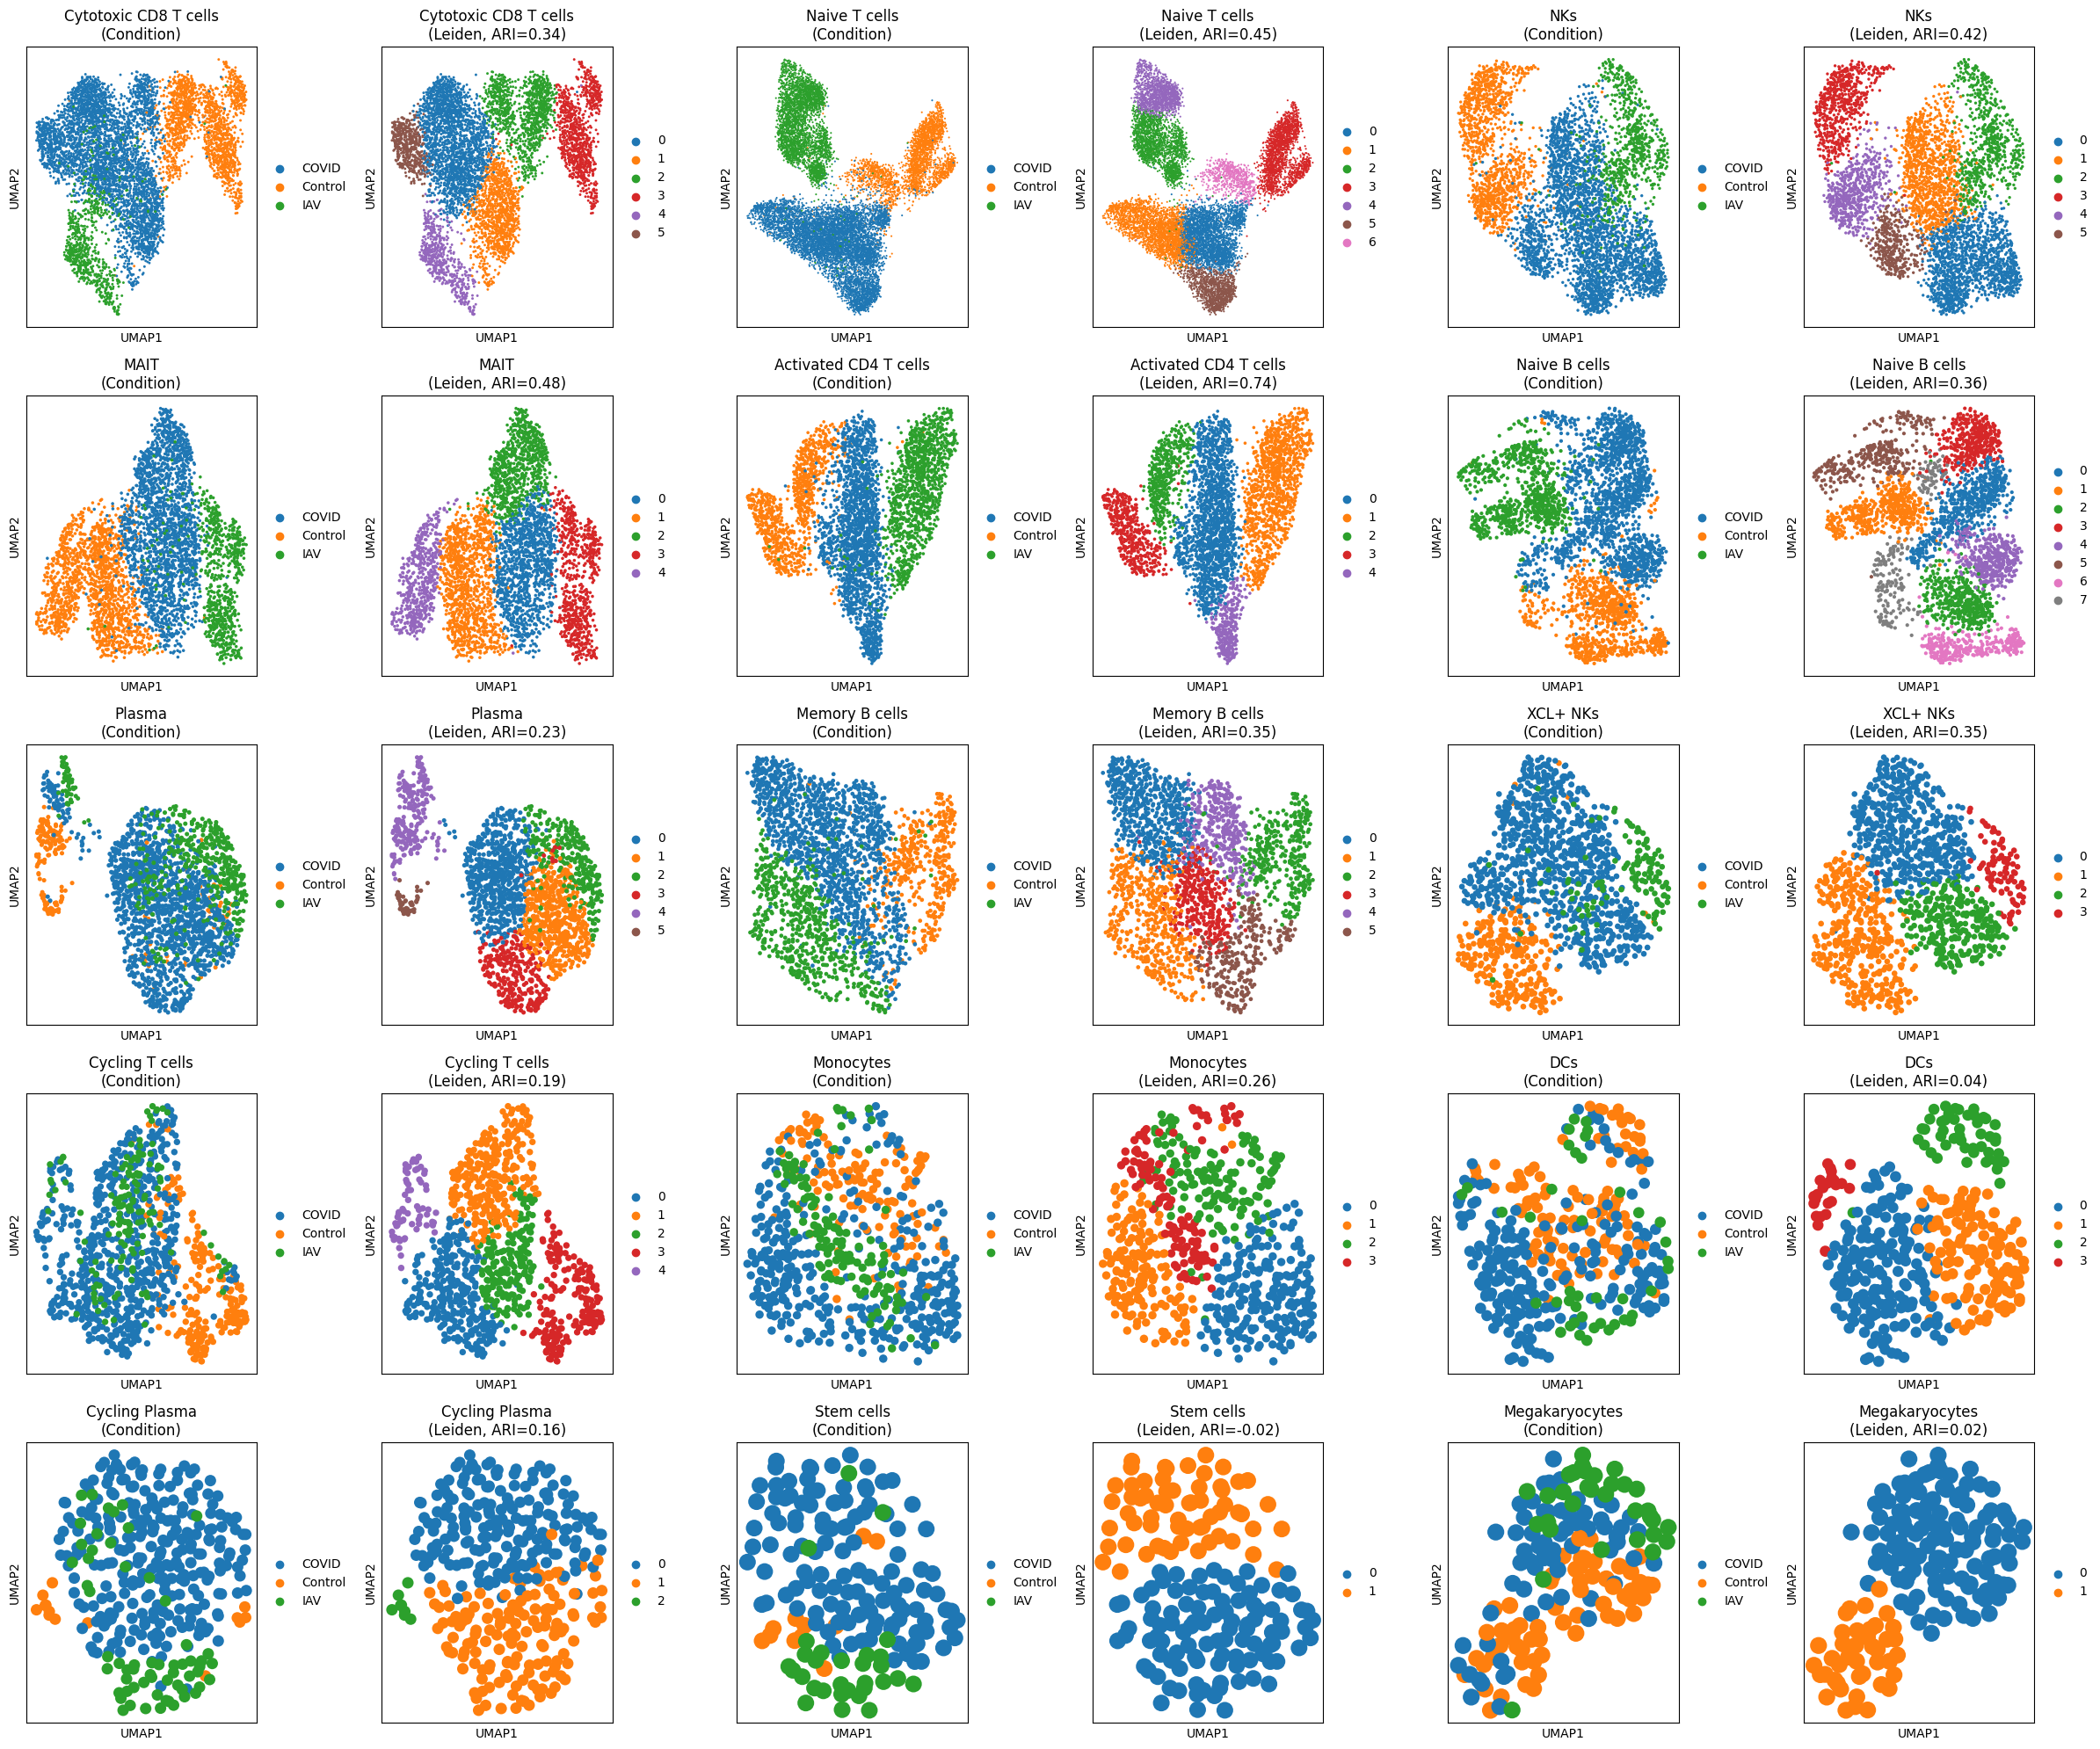

In [10]:
import scanpy as sc
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score

# Define cell type mapping
cell_type_mapping = {
    0: "Cytotoxic CD8 T cells",
    1: "Naive T cells",
    2: "NKs",
    3: "MAIT",
    4: "Activated CD4 T cells",
    5: "Naive B cells",
    6: "Plasma",
    7: "Memory B cells",
    8: "XCL+ NKs",
    9: "Cycling T cells",
    10: "Monocytes",
    11: "DCs",
    12: "Cycling Plasma",
    13: "Stem cells",
    14: "Megakaryocytes",
}

n_cells = len(cell_type_mapping)
ncols = 6
nrows = (n_cells + 2) // 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4 * ncols, 4 * nrows))
axes = axes.flatten()

for i, (cell_id, cell_name) in enumerate(cell_type_mapping.items()):
    subset = adata[adata.obs["cell_type"] == cell_id].copy()
    
    if subset.n_obs < 5:
        continue  # Skip small clusters

    # Run full Scanpy pipeline on subset
    sc.pp.normalize_total(subset, target_sum=1e4)
    sc.pp.log1p(subset)
    sc.pp.pca(subset)
    sc.pp.neighbors(subset)
    sc.tl.umap(subset)
    sc.tl.leiden(subset, resolution=0.5)

    # Compute ARI between Leiden and true condition
    labels_true = subset.obs["condition"].values
    labels_pred = subset.obs["leiden"].values
    ari = adjusted_rand_score(labels_true, labels_pred)

    # Left: condition
    ax_cond = axes[2 * i]
    sc.pl.umap(subset, color="condition", ax=ax_cond, show=False, title=f"{cell_name}\n(Condition)")

    # Right: Leiden clusters with ARI
    ax_lei = axes[2 * i + 1]
    sc.pl.umap(subset, color="leiden", ax=ax_lei, show=False,
               title=f"{cell_name}\n(Leiden, ARI={ari:.2f})")

# Clean up
for j in range(2 * n_cells, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Trying resolution: 0.3
Number of clusters: 5
Trying resolution: 0.24
Number of clusters: 5
Trying resolution: 0.192
Number of clusters: 3
Trying resolution: 0.3
Number of clusters: 4
Trying resolution: 0.24
Number of clusters: 4
Trying resolution: 0.192
Number of clusters: 3
Trying resolution: 0.3
Number of clusters: 5
Trying resolution: 0.24
Number of clusters: 4
Trying resolution: 0.192
Number of clusters: 3
Trying resolution: 0.3
Number of clusters: 3
Trying resolution: 0.3
Number of clusters: 4
Trying resolution: 0.24
Number of clusters: 3
Trying resolution: 0.3
Number of clusters: 4
Trying resolution: 0.24
Number of clusters: 4
Trying resolution: 0.192
Number of clusters: 4
Trying resolution: 0.15360000000000001
Number of clusters: 3
Trying resolution: 0.3
Number of clusters: 3
Trying resolution: 0.3
Number of clusters: 3
Trying resolution: 0.3
Number of clusters: 3
Trying resolution: 0.3
Number of clusters: 4
Trying resolution: 0.24
Number of clusters: 4
Trying resolution: 0.192


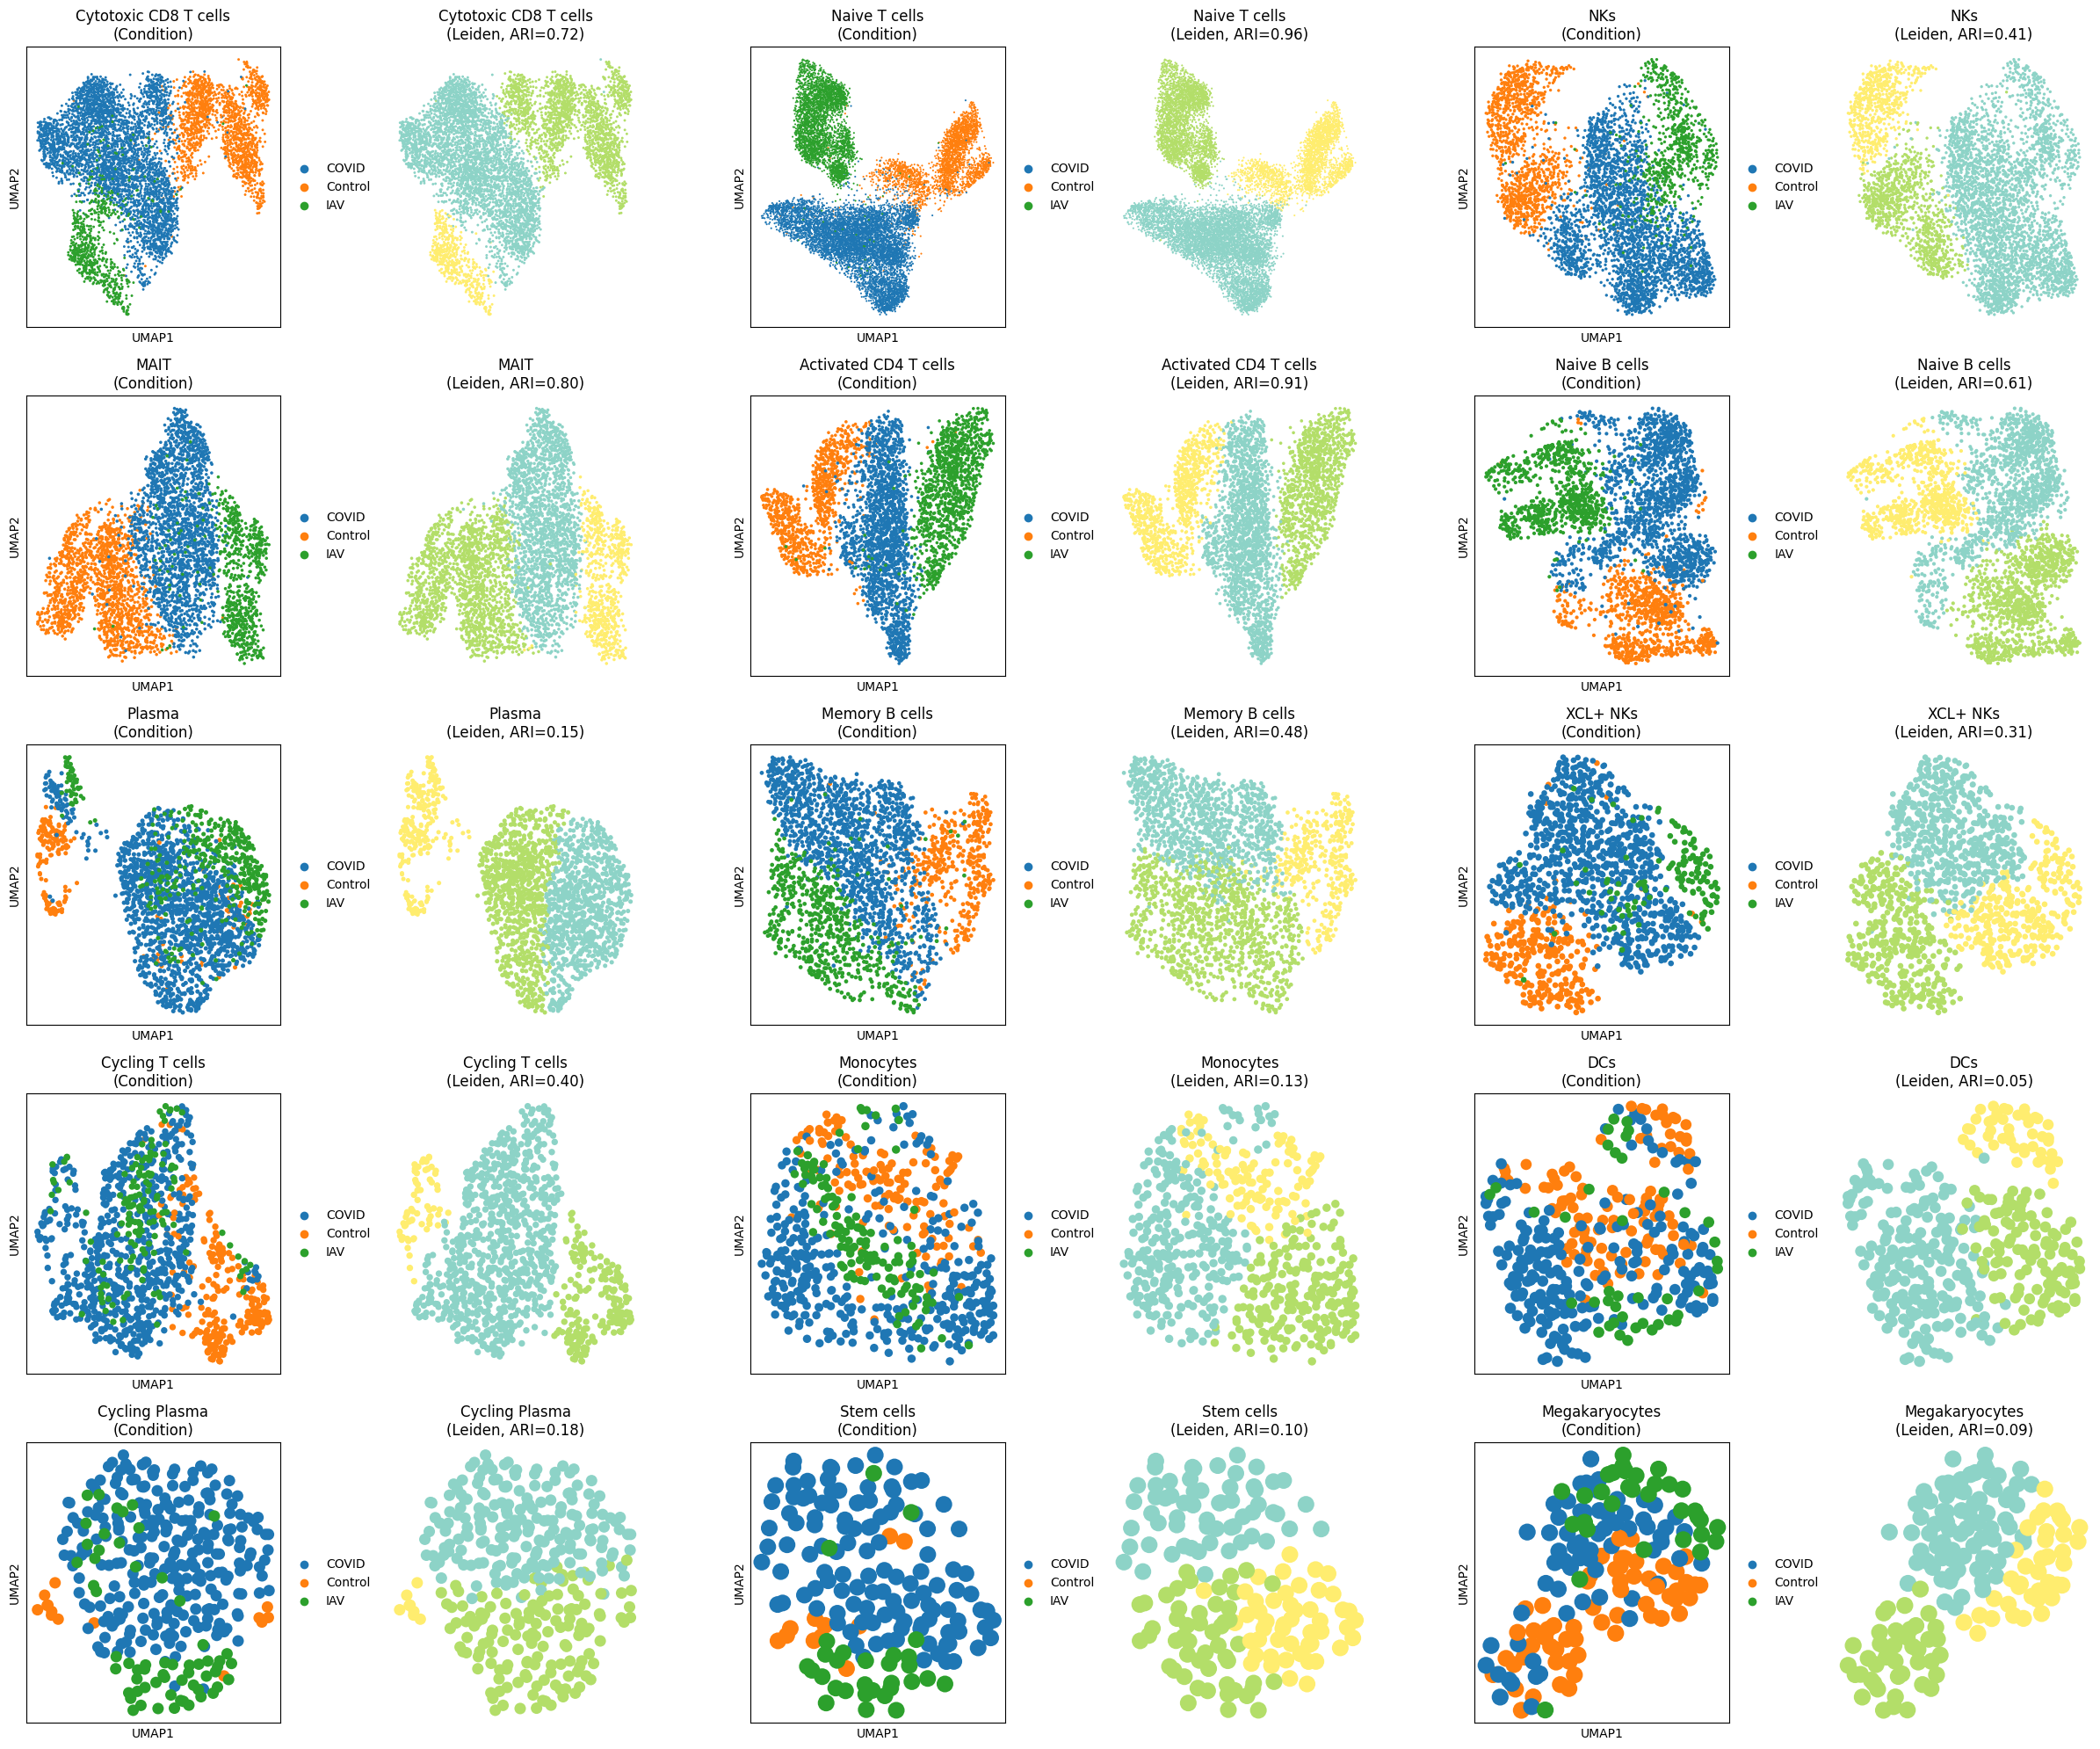

In [16]:
import scanpy as sc
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score
import numpy as np

# Define cell type mapping
cell_type_mapping = {
    0: "Cytotoxic CD8 T cells",
    1: "Naive T cells",
    2: "NKs",
    3: "MAIT",
    4: "Activated CD4 T cells",
    5: "Naive B cells",
    6: "Plasma",
    7: "Memory B cells",
    8: "XCL+ NKs",
    9: "Cycling T cells",
    10: "Monocytes",
    11: "DCs",
    12: "Cycling Plasma",
    13: "Stem cells",
    14: "Megakaryocytes",
}

# Parameters
target_n_clusters = 3
initial_resolution = 0.3
tolerance = 1
max_iterations = 10

n_cells = len(cell_type_mapping)
ncols = 6
nrows = (n_cells + 2) // 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4 * ncols, 4 * nrows))
axes = axes.flatten()

ari_scores = {}

for i, (cell_id, cell_name) in enumerate(cell_type_mapping.items()):
    subset = adata[adata.obs["cell_type"] == cell_id].copy()
    
    if subset.n_obs < 5:
        continue

    # Preprocessing
    sc.pp.normalize_total(subset, target_sum=1e4)
    sc.pp.log1p(subset)
    sc.pp.pca(subset)
    sc.pp.neighbors(subset)
    sc.tl.umap(subset)

    # Find resolution that gives ~3 clusters
    resolution = initial_resolution
    for _ in range(max_iterations):
        print(f"Trying resolution: {resolution}")
        sc.tl.leiden(subset, resolution=resolution, key_added='leiden_temp')
        n_clusters = len(np.unique(subset.obs['leiden_temp']))
        print(f"Number of clusters: {n_clusters}")
        if n_clusters == target_n_clusters:
            print("="*50)
            break
        resolution *= 1.2 if n_clusters < target_n_clusters else 0.8
        

    # Save final clustering
    subset.obs['leiden'] = subset.obs['leiden_temp']

    # Compute ARI
    labels_true = subset.obs["condition"].values
    labels_pred = subset.obs["leiden"].values
    ari = adjusted_rand_score(labels_true, labels_pred)
    ari_scores[cell_name] = ari

    # Plot condition
    ax_cond = axes[2 * i]
    sc.pl.umap(subset, color="condition", ax=ax_cond, show=False,
               title=f"{cell_name}\n(Condition)")

    # Plot leiden
    ax_lei = axes[2 * i + 1]
    sc.pl.umap(subset, color="leiden", ax=ax_lei, show=False,
               title=f"{cell_name}\n(Leiden, ARI={ari:.2f})",
               palette='Set3', legend_loc=None, frameon=False)

# Clean up
for j in range(2 * n_cells, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
